In [ ]:
# تثبيت المكتبات الضرورية (لو مش موجودة)
!pip install pandas matplotlib seaborn scikit-learn


https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [12]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [13]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [17]:
df.rename(columns={'Annual Income (k$)': 'AnnualIncome',
                   'Spending Score (1-100)': 'SpendingScore'}, inplace=True)


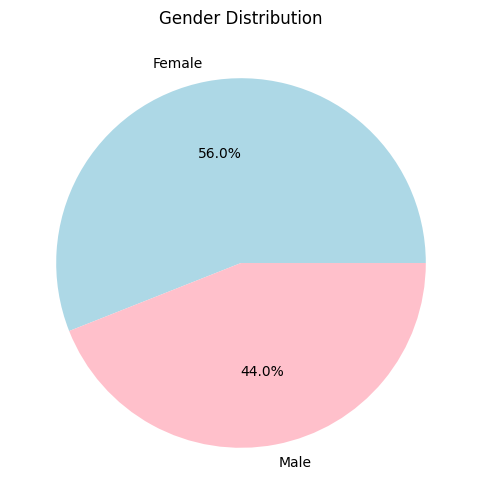

In [19]:
plt.figure(figsize=(6,6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue','pink'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

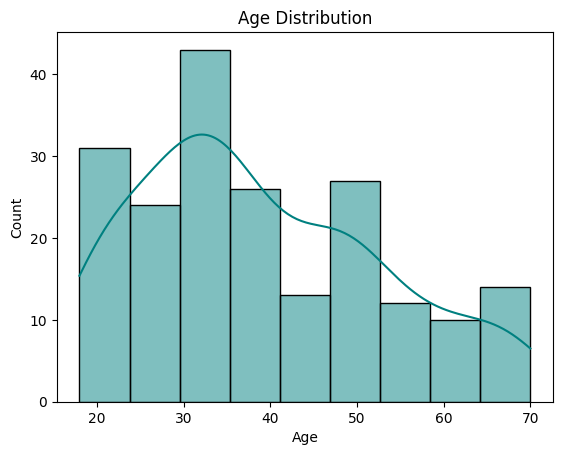

In [20]:
sns.histplot(df['Age'], kde=True, color='teal')
plt.title('Age Distribution')
plt.show()

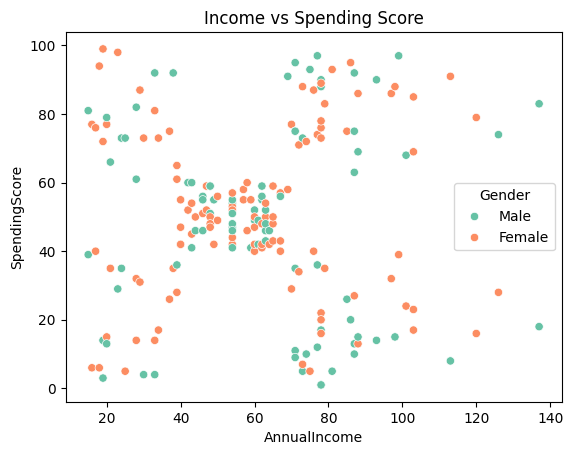

In [21]:
sns.scatterplot(x='AnnualIncome', y='SpendingScore', data=df, hue='Gender', palette='Set2')
plt.title('Income vs Spending Score')
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler

X = df[['Age', 'AnnualIncome', 'SpendingScore']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


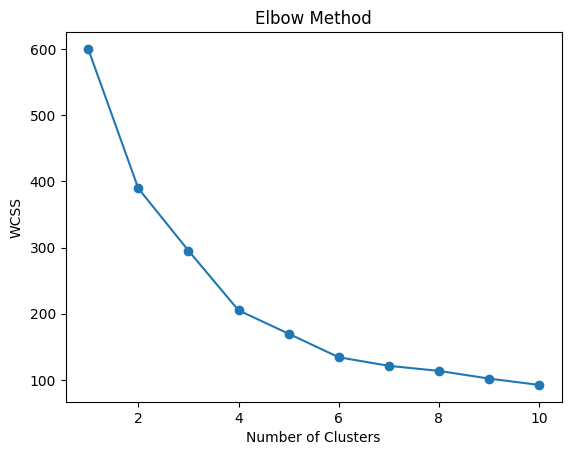

In [23]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [24]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters


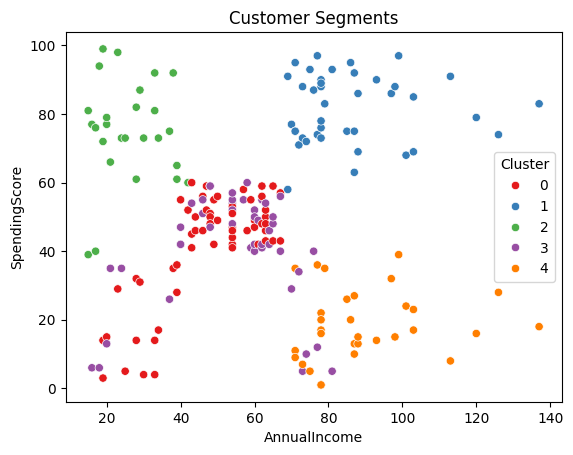

In [25]:
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments')
plt.show()


In [26]:
# prompt: save the model and the scaler

import joblib

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save the KMeans model
joblib.dump(kmeans, 'kmeans_model.pkl')

print("Scaler and model saved successfully.")

Scaler and model saved successfully.


In [28]:
# prompt: deploy the model in gradio and name thefive catigories

!pip install gradio
import gradio as gr
import joblib
import numpy as np

# Load the scaler and KMeans model
scaler = joblib.load('scaler.pkl')
kmeans = joblib.load('kmeans_model.pkl')

# Define the categories based on the typical interpretation of K-Means clustering results on this dataset
categories = {
    0: "Standard (Avg. Income, Avg. Spending)",
    1: "Careful (Low Income, Low Spending)",
    2: "Target (High Income, High Spending)",
    3: "Careless (High Income, Low Spending)",
    4: "Sensible (Low Income, High Spending)"
}

def predict_segment(age, annual_income, spending_score):
    """
    Predicts the customer segment based on input features.
    """
    input_data = np.array([[age, annual_income, spending_score]])
    input_scaled = scaler.transform(input_data)
    cluster = kmeans.predict(input_scaled)[0]
    return categories[cluster]

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_segment,
    inputs=[
        gr.Slider(minimum=18, maximum=70, value=30, label="Age"),
        gr.Slider(minimum=15, maximum=137, value=60, label="Annual Income (k$)"),
        gr.Slider(minimum=1, maximum=100, value=50, label="Spending Score (1-100)")
    ],
    outputs=gr.Textbox(label="Predicted Customer Segment"),
    title="Customer Segmentation Predictor",
    description="Enter customer details to predict their segment."
)

# Launch the interface
iface.launch(debug=True)


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://c7925c12febed5bebb.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Created dataset file at: .gradio/flagged/dataset1.csv
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://c7925c12febed5bebb.gradio.live
